In [17]:
import torch
from torch.optim import Adam, RMSprop
import torch.optim.lr_scheduler as schedulers

In [18]:
model = torch.nn.Linear(1, 1)
optimizer = RMSprop(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
optimizer = Adam(model.parameters(), lr=0.1, weight_decay=1e-5)

In [19]:
def get_lr_scheduler(optimizer: torch.optim.Optimizer, lr_type: str, **kwargs) -> torch.optim.lr_scheduler.LRScheduler:
  supported_schedulers = {
      "FixLR": schedulers.LambdaLR,
      "LinearLR": schedulers.LinearLR,
      "OneCycleLR": schedulers.OneCycleLR,
      "ExponentialLR": schedulers.ExponentialLR,
      "ReduceLROnPlateau": schedulers.ReduceLROnPlateau,
      "CyclicLR": schedulers.CyclicLR,
      # Add more schedulers here as needed
  }

  if lr_type not in supported_schedulers:
    raise ValueError(f"Unsupported learning rate scheduler type: {lr_type}")

  scheduler_cls = supported_schedulers[lr_type]
  return scheduler_cls(optimizer, **kwargs)

get_lr_scheduler(optimizer, "FixLR", lr_lambda=lambda _: 1)
get_lr_scheduler(optimizer, "LinearLR", start_factor=1, end_factor=0.1, total_steps=100)
get_lr_scheduler(optimizer, "ExponentialLR", gamma=0.95)
get_lr_scheduler(optimizer, "ReduceLROnPlateau", mode="min", factor=0.1)

In [ ]:
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=5, mode="triangular")
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=5, mode="triangular2")

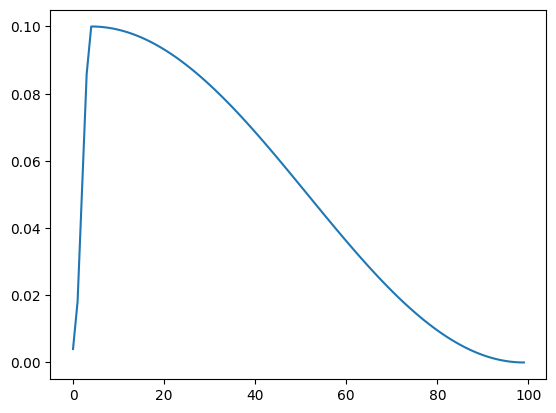

In [33]:
import matplotlib.pyplot as plt


model = torch.nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, pct_start=0.05, steps_per_epoch=10, epochs=10)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

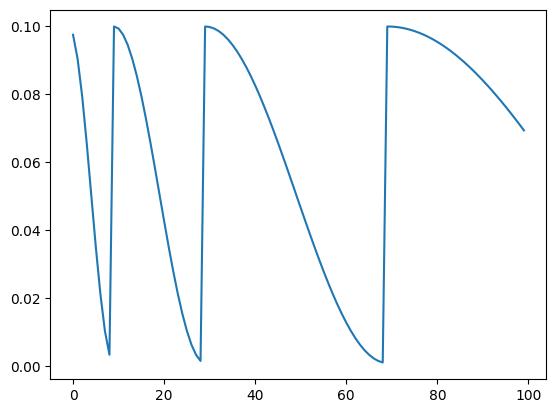

In [45]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.001, last_epoch=-1)


lrs = []

for i in range(100):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)